# 灰度变换

## 1. 灰度变换概述

灰度变换是指根据某种目标条件按一定变换关系逐点改变源图像中每一个像素灰度值的方法。目的是为了改善画质，使图像的显示效果更加清晰。 图像的灰度变换处理是图像增强处理技术中的一种非常基础、直接的空间域图像处理方法，也是图像数字化软件和图像显示软件的一个重要组成部分。

常用的灰度变换有：
- 反色变化
- 对数变换
- 伽马变换

## 2. 反色变换

图像的反色变换，即图像反转，将黑色像素点变白色，白色像素点变黑色。广义的反色变换也可以应用于彩色图像，即对所有像素点取补。图像的反转处理可以增强暗色区域中的白色或灰色细节。

变换公式：

output = max(input) - input

### 2.1. 环境准备

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### 2.2. 矩阵变换

定义一个矩阵：

In [2]:
mat = np.asarray([[160,0,120],
                 [20,60,150],
                 [10,90,160]])

In [3]:
mat

array([[160,   0, 120],
       [ 20,  60, 150],
       [ 10,  90, 160]])

反色变换：

In [4]:
outmat = np.max(mat) - mat

解释：
- np.max()会求出矩阵中的最大数
- 一个数去减去一个矩阵时，numpy的广播机制会将将这个数转变为这个数对应的矩阵（详见[广播机制](https://www.numpy.org.cn/user/basics/broadcasting.html#%E4%B8%80%E8%88%AC%E5%B9%BF%E6%92%AD%E8%A7%84%E5%88%99)）

In [5]:
outmat

array([[  0, 160,  40],
       [140, 100,  10],
       [150,  70,   0]])

### 2.3.图像变换

这个一张X光照片：

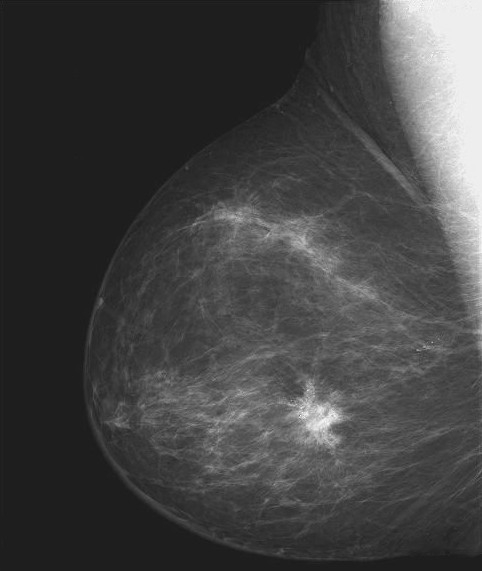

In [6]:
img = Image.open('./image/X.jpg')
img.show()

转换为Numpy数组：

In [7]:
img_mat = np.asarray(img)

In [8]:
img_mat

array([[ 26,  27,  32, ..., 239, 238, 238],
       [ 34,  30,  40, ..., 239, 238, 238],
       [ 33,  26,  39, ..., 238, 238, 238],
       ...,
       [ 31,  30,  30, ...,  30,  30,  30],
       [ 31,  30,  30, ...,  30,  30,  30],
       [ 31,  30,  30, ...,  30,  30,  30]], dtype=uint8)

反色变换：

In [9]:
out_img = np.max(img_mat) - img_mat

In [10]:
out_img

array([[229, 228, 223, ...,  16,  17,  17],
       [221, 225, 215, ...,  16,  17,  17],
       [222, 229, 216, ...,  17,  17,  17],
       ...,
       [224, 225, 225, ..., 225, 225, 225],
       [224, 225, 225, ..., 225, 225, 225],
       [224, 225, 225, ..., 225, 225, 225]], dtype=uint8)

使用pyplot绘制：

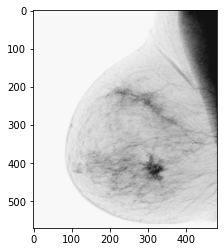

In [11]:
fig, ax = plt.subplots()
im = ax.imshow(out_img, cmap="gray")

plt.show()

对比显示：

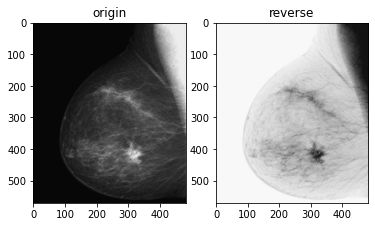

In [12]:
fig, axs = plt.subplots(ncols=2, sharex=True)
axs[0].set_title('origin')
axs[0].imshow(img_mat, cmap="gray")

axs[1].set_title('reverse')
axs[1].imshow(out_img, cmap="gray")
plt.show()

注意:
- pyplot的具体使用参考[官网示例](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html)
 - set_title()中尽量使用英文，如需使用中文，请确保你的OS中有相应字体并设置
 ```python
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
```
具体可参考[Python 之 plt.rcParams[]](https://www.cnblogs.com/shanger/p/13021452.html)

### 2.4.opencv中的反色变换

In [13]:
import cv2 as cv

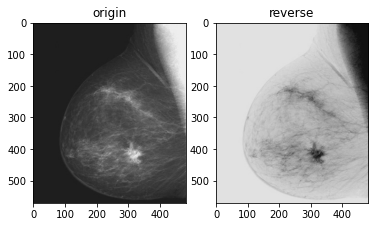

In [14]:
fig, axs = plt.subplots(ncols=2, sharex=True)
axs[0].set_title('origin')
axs[0].imshow(cv.imread("./image/X.jpg"), cmap="gray")

axs[1].set_title('reverse')
axs[1].imshow(cv.bitwise_not(cv.imread("./image/X.jpg")), cmap="gray")
plt.show()

## 3. 对数变换

对数变换将输入中范围较窄的低灰度值映射为输出中范围较宽的灰度值，或将输入中范围较宽的高灰度值映射为输出中范围较窄的灰度值，如图所示：

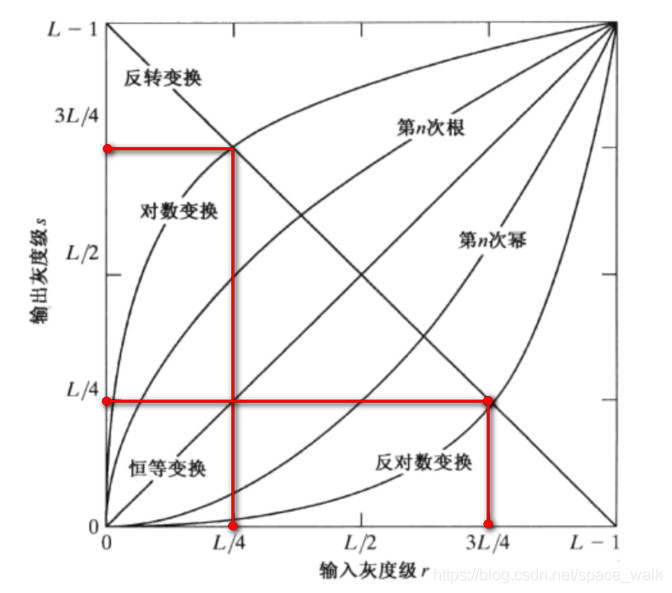([图像来源](https://img-blog.csdnimg.cn/20190716154046304.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3NwYWNlX3dhbGs=,size_16,color_FFFFFF,t_70))

对数变换公式：

output = log(1 + input)

注意：1是为了保证真数不为0

### 3.1.环境准备

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### 3.2.矩阵变换

定义一个矩阵：

In [16]:
mat = np.asarray([[10,200],
                 [300,25500]])

In [17]:
mat

array([[   10,   200],
       [  300, 25500]])

对数变换：

In [18]:
out_mat = np.log(mat)

In [19]:
out_mat

array([[ 2.30258509,  5.29831737],
       [ 5.70378247, 10.14643373]])

### 3.3.图像显示

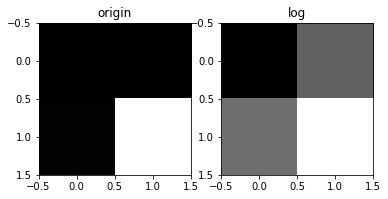

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_title('origin')
ax1.imshow(mat, cmap='gray')

ax2 = fig.add_subplot(122)
ax2.set_title('log')
ax2.imshow(out_mat, cmap='gray')

plt.show()

可以看到：对数变换，将边缘的差距扩大了，但是将中间的差距压缩了